### Analysis software development 

Goal: establish smooth reading of the binary DAQ datafiles

In [1]:
import sys
sys.path.insert(0,'python/')
import struct
import matplotlib.pyplot as plt
import numpy as np
# import data handling class
from DT5550 import *

Filename to process

Open a datafile and read the data

In [32]:
#
# open the datfile
#
#io = DT5550(file='../../data/20211213_103444/data_20211213_103444_0.raw')
io = DT5550(indir='../../data/20211213_153034/')
#io = DT5550(file='../../DT5550_DAQ/daq/ReadoutClient/test0.raw')


t0 = []
t1 = []
for file in io.filenames:
    io.open_data(file)
    while io.read_event() == 0:
        if io.n_event%100000 == 0:
            print('Processed ',io.n_event,' events')
        if (io.valid[1] == 1) and (io.valid[5] == 1) and (io.Q[1]>490) and (io.Q[1]<530) and (io.Q[5]>490) and (io.Q[5]<530):
            t0.append(io.t[1])
            t1.append(io.t[5])

t0 = np.array(t0)
t1 = np.array(t1)
print('Processing done')

DT5550:: Data recorded with config:  ../../data/20211213_153034\config_20211213_153034.json
DT5550:: Open data file: ../../data/20211213_153034\data_20211213_153034_0.raw
Processed  100000  events
DT5550:: Open data file: ../../data/20211213_153034\data_20211213_153034_1.raw
Processed  200000  events
DT5550:: Open data file: ../../data/20211213_153034\data_20211213_153034_2.raw
Processing done


A few basic plots: integrated charge and time

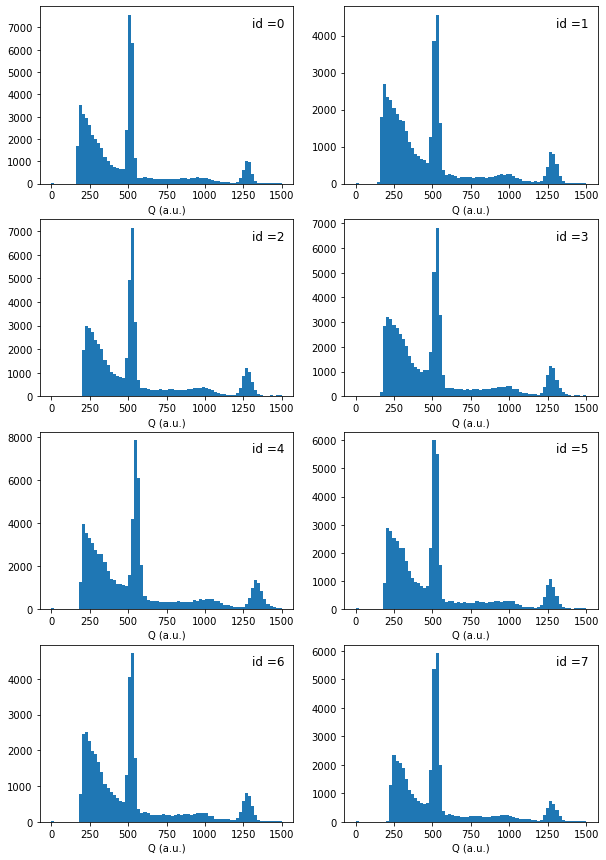

In [33]:
io.plot_all(type="charge",bins=75,logy=False, range=(0,1500))

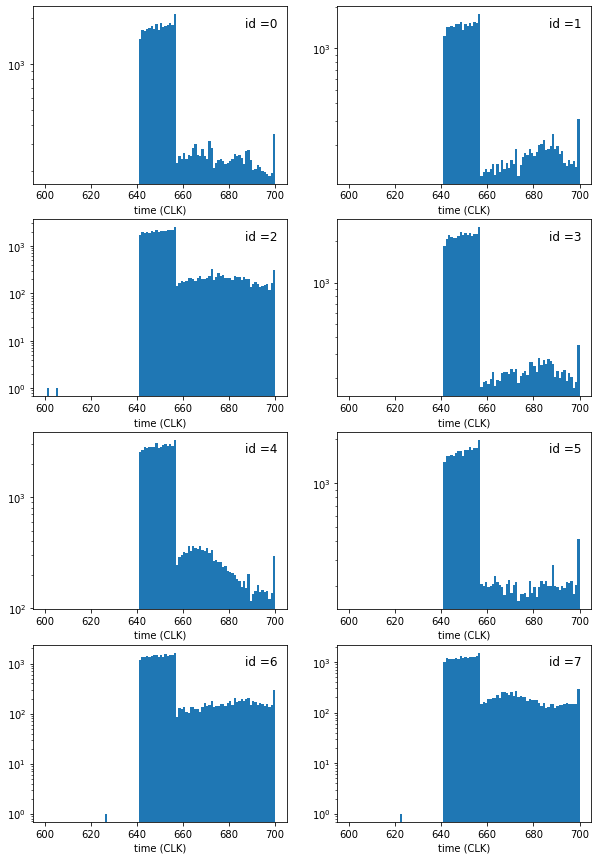

In [34]:
io.plot_all(type="time",range=(600,700),bins=100,logy=True)

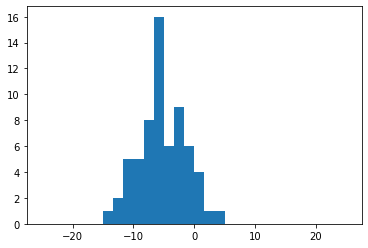

In [36]:
h = plt.hist((t0-t1)*12.5/16,bins=30,range=(-25,25))

In [37]:
dt = (t0-t1)*12.5/16


In [38]:
dt[abs(dt)<20].mean()

-5.26123046875

In [39]:
np.sqrt(dt[abs(dt-(-5.26))<10].var())/np.sqrt(2)

2.5451440604381284

In [14]:
1.2*np.sqrt(2)

1.697056274847714

In [28]:
12.5/16*np.sqrt(2)

1.1048543456039805